# Бэггинг (Bagging - Bootstrap Aggregating)

**Идея метода:**

Бэггинг **(сокращение от Bootstrap Aggregating)** — это метод ансамблевого обучения, который уменьшает дисперсию модели и снижает вероятность переобучения. Он основан на обучении нескольких независимых моделей на случайных подвыборках данных и усреднении их предсказаний.





### Как работает бэггинг?

**1.	Генерация подвыборок (Bootstrap Sampling)**

-	Из обучающего набора данных случайно выбираются подвыборки с повторениями.
-	Каждая подвыборка имеет тот же размер, что и исходный датасет, но может содержать дубликаты.
    



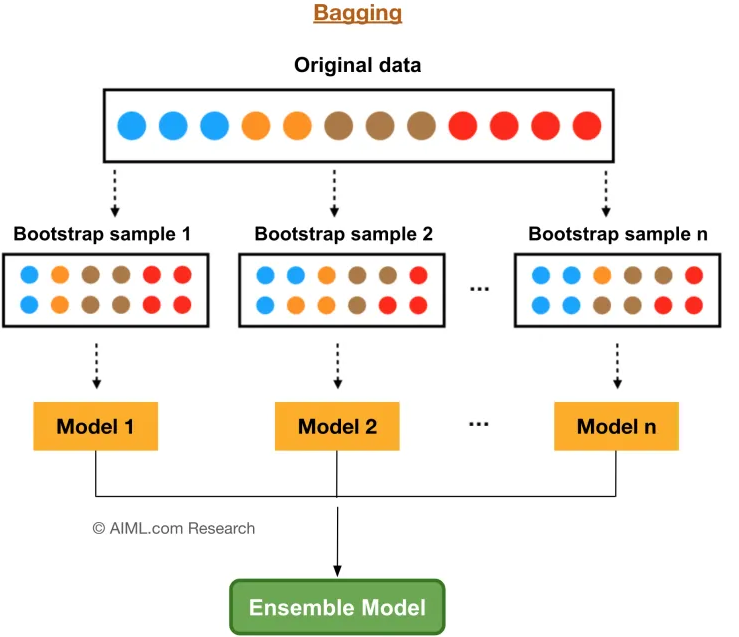

**2.	Обучение нескольких моделей (Base Learners)**

-	Для каждой подвыборки обучается отдельная модель.
-	Обычно в качестве базовой модели используют слабые алгоритмы (например, деревья решений)


**3.	Комбинирование предсказаний (Aggregation)**

-	В случае классификации используется голосование (выбирается наиболее частый ответ).
-	В случае регрессии берётся среднее значение предсказаний всех моделей.

## Работа с дубликатами

**Дубликаты в предобработке данных (до обучения)**

Когда мы очищаем данные, мы удаляем дубликаты, потому что:

✅ Повторяющиеся строки не несут новой информации → не улучшают обучение.

✅ Если одна и та же строка повторяется много раз, модель может сместиться в сторону этих данных и переобучиться.

✅ В некоторых случаях дубликаты — это ошибки сбора данных (например, один и тот же пользователь дважды в таблице).

Пример:
*Если у нас 1000 записей, из которых 500 — это одна и та же строка, модель будет думать, что этот класс встречается чаще, чем есть на самом деле.*

⸻

**Дубликаты в бэггинге (при генерации подвыборок)**

В бэггинге мы специально создаём дубликаты, но в разных подвыборках.

✅ Каждая модель видит свою часть данных, иногда повторяющиеся.

✅ Эти дубликаты приводят к разным деревьям решений, что создаёт разнообразие в ансамбле.

✅ Если данных мало, бутстрап помогает сделать так, чтобы каждая модель всё равно обучалась на полном объёме информации, но с разными приоритетами.

Пример:

*Допустим, у нас есть 1000 объектов, и мы создаём 100 подвыборок с бутстрапом. Каждый отдельный набор данных будет содержать случайные повторения разных объектов, но в целом ансамбль видит всё множество данных.*

## Random Subspaces Method

В классическом бэггинге случайные подвыборки создаются по объектам, но все признаки остаются неизменными. Однако можно использовать вариант бэггинга, где отбираются ещё и случайные подмножества признаков — это называется “случайные подпространства” (Random Subspaces Method).

## Зачем случайные признаки в бэггинге?

1️⃣ Снижение корреляции между моделями

- Если все деревья обучаются на одних и тех же признаках, они становятся очень похожими.
- Если мы заставляем каждое дерево учиться на случайных подмножествах признаков, они начинают видеть разные стороны данных.
- Итоговая комбинация разных моделей (например, усреднение или голосование) становится более устойчивой.

2️⃣ Снижение переобучения
- Когда деревья слишком глубоко обучаются на всех признаках, они легко подстраиваются под шум и переобучаются.
- Ограничивая количество признаков, мы усложняем задачу отдельному дереву, но делаем ансамбль более обобщающим.

3️⃣ Повышение скорости обучения
- Если у нас очень много признаков, обучение каждого дерева занимает больше времени.
- Если каждое дерево использует только часть признаков, оно обучается быстрее, а ансамбль остаётся мощным.

# Градиентный бустинг (Gradient Boosting)

**Градиентный бустинг (Gradient Boosting)** — это мощный ансамбль методов машинного обучения, используемый для решения задач регрессии и классификации. Основная идея заключается в последовательном обучении слабых моделей (обычно деревьев решений), где каждая новая модель строится таким образом, чтобы минимизировать остаточные ошибки от предыдущих моделей.

**Основные шаги алгоритма:**

- **Инициализация**: создается простая базовая модель (например, дерево решений), которая делает первые предсказания.

- **Построение новых моделей:** каждая последующая модель обучается на остаточных ошибках предыдущих моделей. Это достигается через использование градиента функции потерь (отсюда название "градиентный").

- **Обновление предсказаний:** результаты всех моделей суммируются с определенным весом, чтобы получить итоговый результат.


✅ **Преимущества:**

- Высокая гибкость благодаря использованию различных функций потерь и базовых моделей.
- Отличная производительность на реальных данных.
- Хорошо справляется с шумом и сложностью данных.

❌ **Недостатки:**
- Требует тщательной настройки гиперпараметров.

# Пример работы ансамблиевых методов при решении задачи классификации

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier


In [ ]:
df = pd.read_csv('titanic.csv')
df.head()
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1 # создаем новую переменную на основе двух других
df = df[['Sex','Fare','Age','Family_Size', 'Survived']]
df = pd.get_dummies(df, columns=['Sex'], dtype='int', drop_first=True) # создаем дамми-переменные для категориальных признаков
df['Age'] = df['Age'].fillna(round(df['Age'].mean(), 0))
df

,Fare,Age,Family_Size,Survived,Sex_male
0,7.2500,22.0,2,0,1
1,71.2833,38.0,2,1,0
2,7.9250,26.0,1,1,0
3,53.1000,35.0,2,1,0
4,8.0500,35.0,1,0,1
...,...,...,...,...,...
886,13.0000,27.0,1,0,1
887,30.0000,19.0,1,1,0
888,23.4500,30.0,4,0,0
889,30.0000,26.0,1,1,1


In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

## Random Forest - первое приближение

In [ ]:
rf = RandomForestClassifier(
    n_estimators=500, # количество деревьев в лесу, чем больше, тем лучше, но дольше обучение
    max_depth=5, # глубина строительства всех деревьев
    max_features=None, # количество признаков для выбора при разбиении.
    bootstrap=True, # включение или выключение бутстрап-выборок
    min_samples_split=5, # минимальное количество образцов для разбиения узла
    min_samples_leaf=2, # минимальное кол-во образцов в листе
    random_state=42,
    class_weight=None,
    verbose=1,
    n_jobs=-1
)

In [ ]:
rf.fit(X_train, y_train)
y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.1s finis

In [ ]:
print(f'rf train accuracy {accuracy_score(y_train, y_pred_train):.3f}')
print(f'fr test accuracy {accuracy_score(y_test, y_pred_test):.3f}')

rf train accuracy 0.848
fr test accuracy 0.816


## Важность признаков

In [ ]:
rf.feature_importances_

array([0.21076927, 0.14051743, 0.10706361, 0.54164969])

In [ ]:
X

,Fare,Age,Family_Size,Sex_male
0,7.2500,22.0,2,1
1,71.2833,38.0,2,0
2,7.9250,26.0,1,0
3,53.1000,35.0,2,0
4,8.0500,35.0,1,1
...,...,...,...,...
886,13.0000,27.0,1,1
887,30.0000,19.0,1,0
888,23.4500,30.0,4,0
889,30.0000,26.0,1,1


## Настройка гипер-параметров Random Forest 🎄

In [ ]:
rf2 = RandomForestClassifier(
    n_estimators=500, # количество деревьев в лесу, чем больше, тем лучше, но дольше обучение
    max_depth=3, # глубина строительства всех деревьев
    max_features=3, # количество признаков для выбора при разбиении.
    bootstrap=True, # включение или выключение бутстрап-выборок
    min_samples_split=5, # минимальное количество образцов для разбиения узла
    min_samples_leaf=2, # минимальное кол-во образцов в листе
    random_state=42,
    class_weight=None,
    verbose=1,
    n_jobs=-1
)

In [ ]:
rf2.fit(X_train, y_train)
y_pred_train = rf2.predict(X_train)
y_pred_test = rf2.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 500 out of 500 | elapsed:    0.1s finis

In [ ]:
print(f'rf train accuracy {accuracy_score(y_train, y_pred_train):.3f}')
print(f'fr test accuracy {accuracy_score(y_test, y_pred_test):.3f}')

rf train accuracy 0.824
fr test accuracy 0.793


## Кросс-валидация на 10 фолдах

In [ ]:
cv_scores = cross_val_score(rf2, X, y, cv=10, scoring='accuracy', n_jobs=-1, verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   10.1s finished


In [ ]:
cv_scores

array([0.81111111, 0.85393258, 0.7752809 , 0.87640449, 0.83146067,
       0.80898876, 0.80898876, 0.79775281, 0.84269663, 0.84269663])

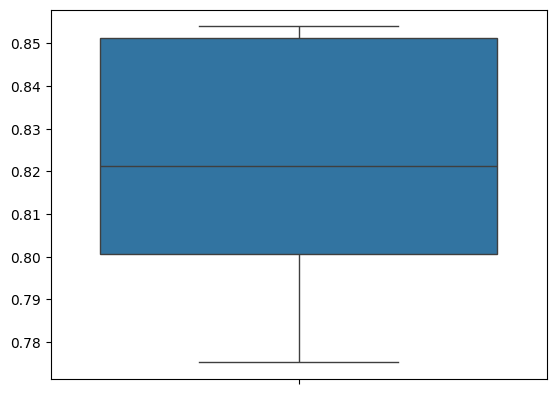

In [ ]:
sns.boxplot(cv_scores)
plt.show()

## Подбор параметров Random Forest по сетке

In [ ]:
param_grid = {
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [2, 3, 4]
}

rf3 = RandomForestClassifier(n_estimators=500, random_state=42)

grid_search = GridSearchCV(estimator=rf3,
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

In [ ]:
grid_search.fit(X_train, y_train)

Лучшие гипер-параметры

In [ ]:
print(grid_search.best_params_)

Лучший результат

In [ ]:
print(grid_search.best_score_)